## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset

In [2]:
X_train = pd.read_csv('Diabetes_XTrain.csv')
X_test = pd.read_csv('Diabetes_XTest.csv')
y_train = pd.read_csv('Diabetes_YTrain.csv')

In [3]:
X_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,168,88,42,321,38.2,0.787,40
1,8,110,76,0,0,27.8,0.237,58
2,7,147,76,0,0,39.4,0.257,43
3,2,100,66,20,90,32.9,0.867,28
4,4,129,86,20,270,35.1,0.231,23


In [4]:
y_train.head()

,Outcome
0,1
1,0
2,1
3,1
4,0


In [5]:
X_train.shape, X_test.shape, y_train.shape

((576, 8), (192, 8), (576, 1))

In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 8 columns):
Pregnancies                 576 non-null int64
Glucose                     576 non-null int64
BloodPressure               576 non-null int64
SkinThickness               576 non-null int64
Insulin                     576 non-null int64
BMI                         576 non-null float64
DiabetesPedigreeFunction    576 non-null float64
Age                         576 non-null int64
dtypes: float64(2), int64(6)
memory usage: 36.1 KB


The info() gives an overall information about the dataset like the datatype, rows and columns, etc.

In [7]:
X_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,3.758681,119.975694,68.826389,20.364583,76.166667,31.857292,0.481519,32.954861
std,3.328783,31.512914,20.285812,15.893856,109.193550,8.134926,0.336910,11.878137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,26.975000,0.247750,24.000000
50%,3.000000,116.000000,72.000000,22.000000,36.000000,32.000000,0.381500,29.000000
75%,6.000000,139.000000,80.000000,32.000000,120.000000,36.725000,0.641250,40.000000
max,17.000000,199.000000,122.000000,63.000000,744.000000,67.100000,2.420000,81.000000


The decribe is a very suitable tool for the statistical summary of the dataset.

## EDA

#### Checking the null values

In [8]:
X_train.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

There are no null values in the dataset.

#### Univariate Analysis

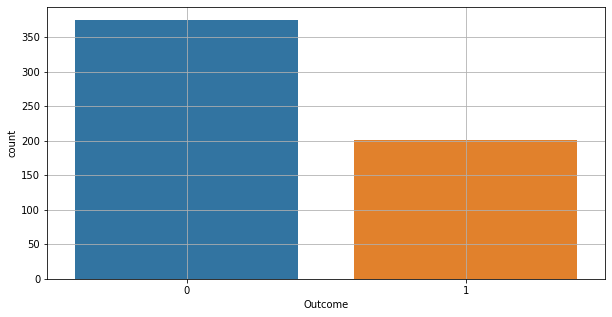

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(y_train['Outcome'])
plt.grid()
plt.show()

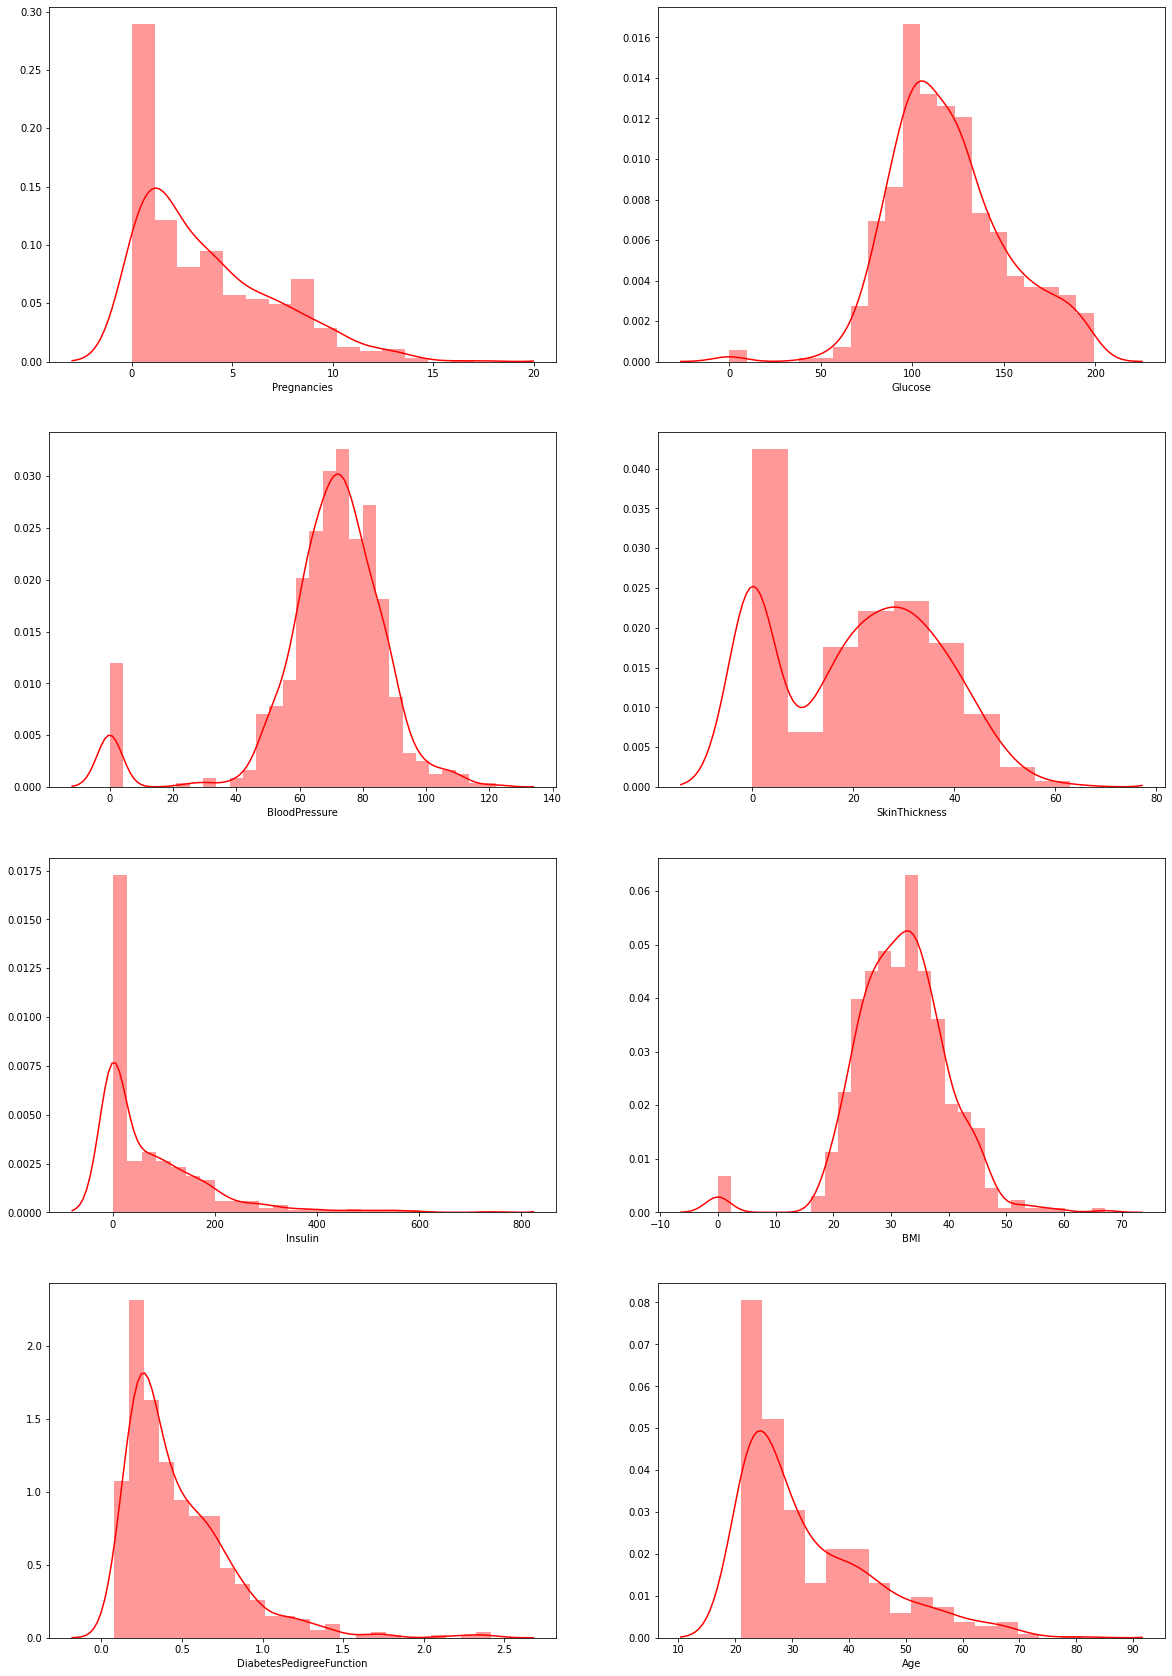

In [10]:
fig, axes = plt.subplots(4,2, figsize=(20,30))
axes = axes.flatten()

for i in range(len(X_train.columns)):
    sns.distplot(X_train.iloc[:,i], ax=axes[i], axlabel=X_train.columns[i], color='r')
    
plt.show()

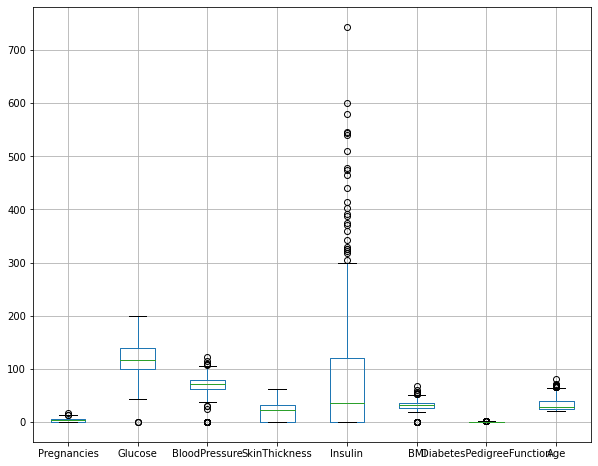

In [11]:
plt.figure(figsize=(10,8))
X_train.boxplot()
plt.show()

We can see there are a lot of outliers specially in Insulin, BMI, and some other features. I suppose this is the reason for the abnormalities in their distribution.

In [12]:
X_train.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64

We can see that there are multiple variables with minimum values 0 which is not possible like the age, insulin, blood pressure, glucose and skin thickness cannot be 0 for any person. So in order to proceed we must remove these first and then proceed.

In [13]:
X_train['Glucose'] = np.where(X_train['Glucose']==0, X_train['Glucose'].median(), X_train['Glucose'])
X_train['BloodPressure'] = np.where(X_train['BloodPressure']==0, X_train['BloodPressure'].median(), X_train['BloodPressure'])
X_train['SkinThickness'] = np.where(X_train['SkinThickness']==0, X_train['SkinThickness'].median(), X_train['SkinThickness'])
X_train['Insulin'] = np.where(X_train['Insulin']==0, X_train['Insulin'].median(), X_train['Insulin'])
X_train['BMI'] = np.where(X_train['BMI']==0, X_train['BMI'].median(), X_train['BMI'])

In [14]:
X_train.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
SkinThickness                7.000
Insulin                     14.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
dtype: float64

#### Bivariate Analysis

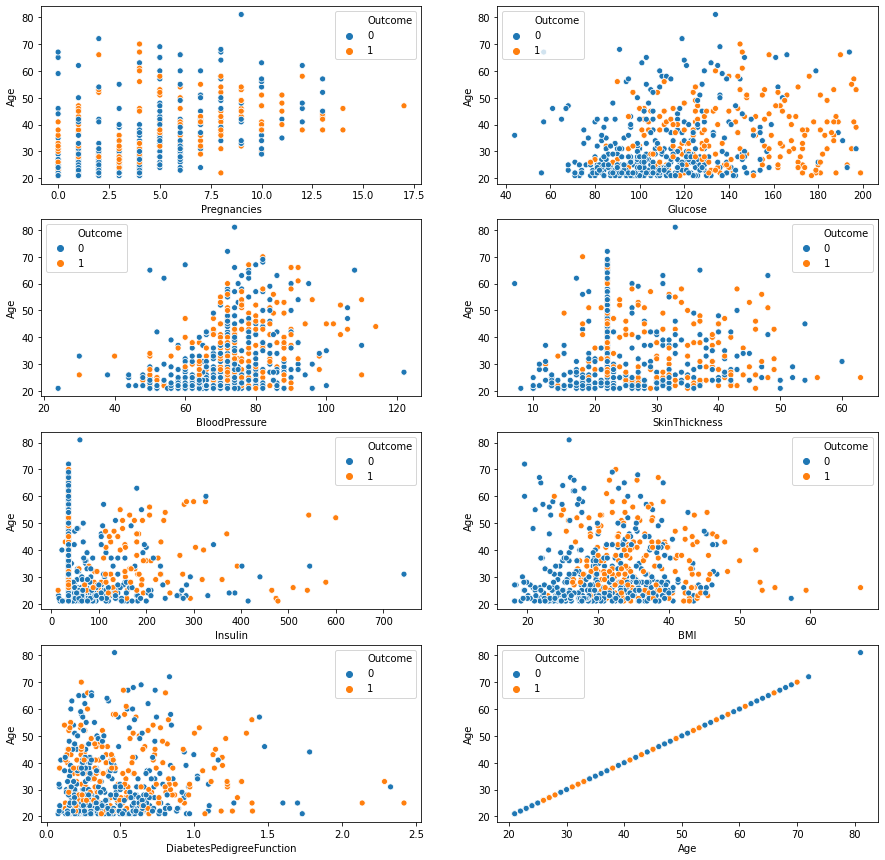

In [15]:
fig, axes = plt.subplots(4,2, figsize=(15,15))
axes = axes.flatten()

for i in range(len(X_train.columns)):
    sns.scatterplot(X_train.iloc[:,i],X_train.iloc[:,-1], hue=y_train['Outcome'], ax=axes[i])
    
plt.show()

#### Multivariate Analysis

In [16]:
df = pd.concat([X_train, y_train], axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,168.0,88.0,42.0,321.0,38.2,0.787,40,1
1,8,110.0,76.0,22.0,36.0,27.8,0.237,58,0
2,7,147.0,76.0,22.0,36.0,39.4,0.257,43,1
3,2,100.0,66.0,20.0,90.0,32.9,0.867,28,1
4,4,129.0,86.0,20.0,270.0,35.1,0.231,23,0


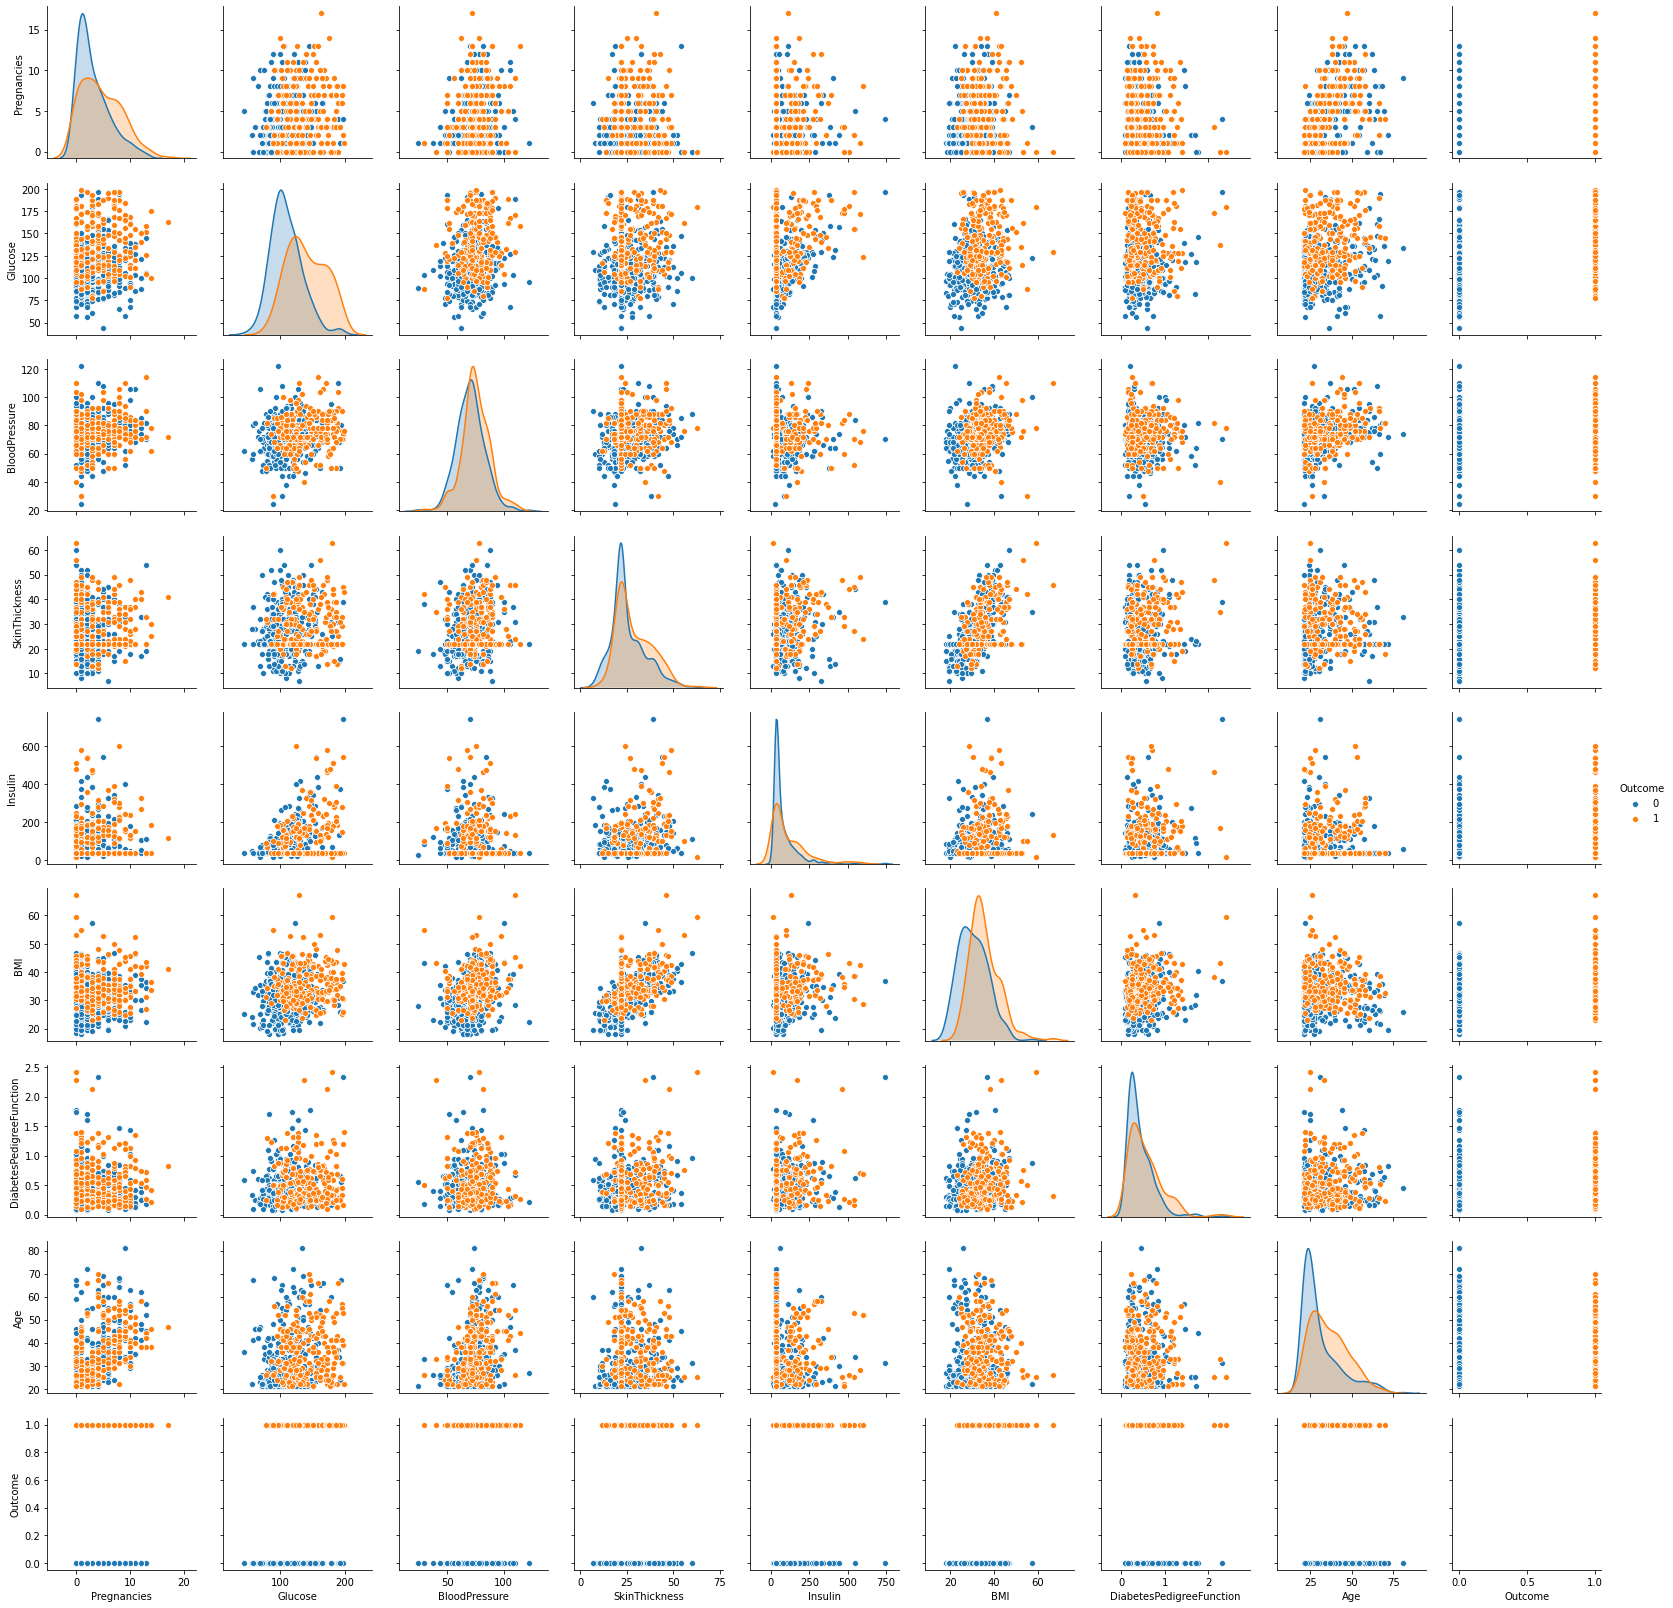

In [17]:
import warnings
warnings.filterwarnings('ignore')

sns.pairplot(df, hue='Outcome', diag_kind='kde')
plt.show()

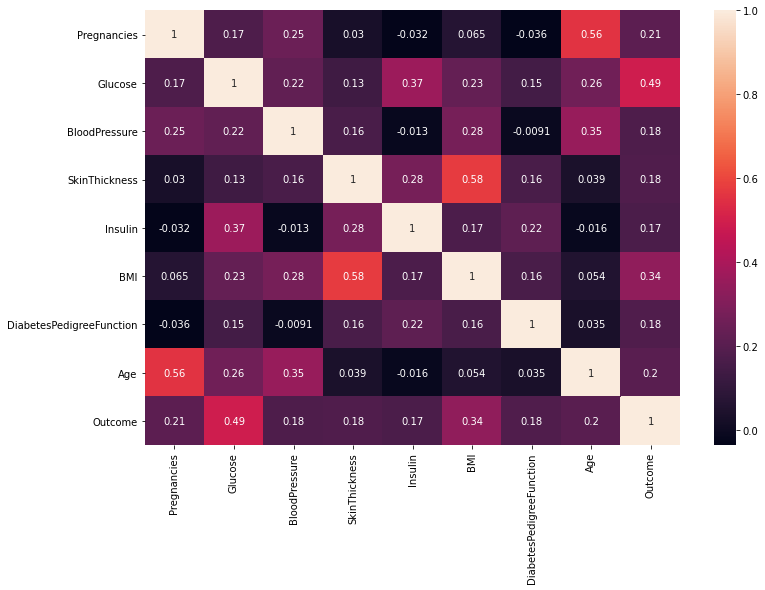

In [18]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

#### Standardizing the Dataset

In [19]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_trains = ss.fit_transform(X_train)
X_tests = ss.fit(X_test)

As there is no need to split this dataset into train and test sets, we could proceed with the Standardization part.

## Statistical Analysis

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF

vif = [VIF(X_train.values, i) for i in range(X_train.shape[1])]
pd.DataFrame(vif, index=X_train.columns, columns=['VIF'])

,VIF
Pregnancies,3.279055
Glucose,20.628282
BloodPressure,30.500983
SkinThickness,14.747838
Insulin,2.467753
BMI,32.952149
DiabetesPedigreeFunction,3.274169
Age,13.940003


Removing the feature with VIF geater than 10 one by one, lets start with removing BMI.

In [21]:
vif = [VIF(X_train.drop('BMI', axis=1).values, i) for i in range(X_train.drop('BMI', axis=1).shape[1])]
pd.DataFrame(vif, index=X_train.drop('BMI', axis=1).columns, columns=['VIF'])

,VIF
Pregnancies,3.278850
Glucose,19.220583
BloodPressure,24.378979
SkinThickness,9.905603
Insulin,2.456844
DiabetesPedigreeFunction,3.228076
Age,13.897362


Still we have features with VIF greater than 10, now we will check by removing BloodPressure.

In [22]:
vif = [VIF(X_train.drop(['BMI', 'BloodPressure','Glucose'], axis=1).values, i) for i in range(X_train.drop(['BMI', 'BloodPressure','Glucose'], axis=1).shape[1])]
pd.DataFrame(vif, index=X_train.drop(['BMI', 'BloodPressure','Glucose'], axis=1).columns, columns=['VIF'])

,VIF
Pregnancies,3.273156
SkinThickness,6.556087
Insulin,2.143880
DiabetesPedigreeFunction,3.122194
Age,8.301189


#### These are the important features by performing VIF.

In [23]:
import statsmodels.api as sm
model = sm.Logit(y_train, X_train.drop(['BMI', 'BloodPressure','Glucose'], axis=1))
result = model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.645089
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  576
Model:                          Logit   Df Residuals:                      571
Method:                           MLE   Df Model:                            4
Date:                Thu, 20 Aug 2020   Pseudo R-squ.:                0.002645
Time:                        00:59:59   Log-Likelihood:                -371.57
converged:                       True   LL-Null:                       -372.56
Covariance Type:            nonrobust   LLR p-value:                    0.7411
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1278      0.032      3.959      0.000       0.065       0.191
SkinThickness               -0.0216      0.008     -2.655      0.008      -0.038      -0.006
Insulin                      0.0022      0.001      2.349      0.019       0.000       0.004
DiabetesPedigreeFunction     0.4229      0.263      1.609      0.108      -0.092       0.938
Age                         -0.0239      0.008     -3.118      0.002      -0.039      -0.009
============================================================================================
"""

## Machine Learning Approach

In [24]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)